In [1]:

import tensorflow as tf
import matplotlib.pylab as plt
import numpy as np

In [2]:
help(tf.Variable)

Help on class Variable in module tensorflow.python.ops.variables:

class Variable(tensorflow.python.training.checkpointable.base.CheckpointableBase)
 |  See the @{$variables$Variables How To} for a high level overview.
 |  
 |  A variable maintains state in the graph across calls to `run()`. You add a
 |  variable to the graph by constructing an instance of the class `Variable`.
 |  
 |  The `Variable()` constructor requires an initial value for the variable,
 |  which can be a `Tensor` of any type and shape. The initial value defines the
 |  type and shape of the variable. After construction, the type and shape of
 |  the variable are fixed. The value can be changed using one of the assign
 |  methods.
 |  
 |  If you want to change the shape of a variable later you have to use an
 |  `assign` Op with `validate_shape=False`.
 |  
 |  Just like any `Tensor`, variables created with `Variable()` can be used as
 |  inputs for other Ops in the graph. Additionally, all the operators
 |  ove

In [24]:
import numpy as np
help(np.arange)

Help on built-in function arange in module numpy.core.multiarray:

arange(...)
    arange([start,] stop[, step,], dtype=None)
    
    Return evenly spaced values within a given interval.
    
    Values are generated within the half-open interval ``[start, stop)``
    (in other words, the interval including `start` but excluding `stop`).
    For integer arguments the function is equivalent to the Python built-in
    `range <http://docs.python.org/lib/built-in-funcs.html>`_ function,
    but returns an ndarray rather than a list.
    
    When using a non-integer step, such as 0.1, the results will often not
    be consistent.  It is better to use ``linspace`` for these cases.
    
    Parameters
    ----------
    start : number, optional
        Start of interval.  The interval includes this value.  The default
        start value is 0.
    stop : number
        End of interval.  The interval does not include this value, except
        in some cases where `step` is not an integer and

In [ ]:
help

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.
   5.   6.   7.   8.   9.  10.]


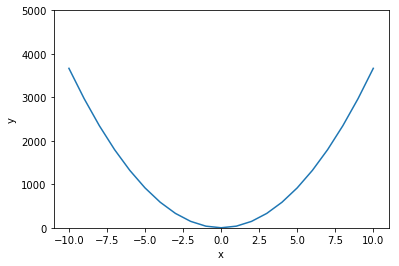

In [103]:
#
#simple hypothesis

#H(x) = Wx


x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

w = tf.Variable(-10, dtype=tf.float32,name='w')
hypothesis = w * x
cost = tf.reduce_mean(tf.square(hypothesis - y))
sess = tf.Session()
sess.run(tf.global_variables_initializer())


x1 = np.arange(-10,11,1,dtype=float)
print(x1)

first = -9
rets = []
for _ in range(21):
    w.load( first, sess)
    first += 1
    ret = sess.run(cost, feed_dict={x:x1,y:x1})
    rets.append(ret)
rets
plt.xlim([-11, 11])
plt.ylim([-1, 5000])
plt.xlabel('x')     
plt.ylabel('y')
#y = x0 * we + bi
        
plt.plot(x1,rets)
        

In [94]:
help(w.load)

Help on method load in module tensorflow.python.ops.variables:

load(value, session=None) method of tensorflow.python.ops.variables.Variable instance
    Load new value into this variable.
    
    Writes new value to variable's memory. Doesn't add ops to the graph.
    
    This convenience method requires a session where the graph
    containing this variable has been launched. If no session is
    passed, the default session is used.  See @{tf.Session} for more
    information on launching a graph and on sessions.
    
    ```python
    v = tf.Variable([1, 2])
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        # Usage passing the session explicitly.
        v.load([2, 3], sess)
        print(v.eval(sess)) # prints [2 3]
        # Usage with the default session.  The 'with' block
        # above makes 'sess' the default session.
        v.load([3, 4], sess)
        print(v.eval()) # prints [3 4]
    ```
    
    Args:
     

In [86]:
w.name

'w_152:0'

In [81]:
help(tf.assign)

Help on function assign in module tensorflow.python.ops.state_ops:

assign(ref, value, validate_shape=None, use_locking=None, name=None)
    Update 'ref' by assigning 'value' to it.
    
    This operation outputs a Tensor that holds the new value of 'ref' after
      the value has been assigned. This makes it easier to chain operations
      that need to use the reset value.
    
    Args:
      ref: A mutable `Tensor`.
        Should be from a `Variable` node. May be uninitialized.
      value: A `Tensor`. Must have the same type as `ref`.
        The value to be assigned to the variable.
      validate_shape: An optional `bool`. Defaults to `True`.
        If true, the operation will validate that the shape
        of 'value' matches the shape of the Tensor being assigned to.  If false,
        'ref' will take on the shape of 'value'.
      use_locking: An optional `bool`. Defaults to `True`.
        If True, the assignment will be protected by a lock;
        otherwise the behavior

In [79]:
w = tf.Variable(-10, tf.float32,name='a')
print(w)
sess.run(tf.global_variables_initializer())
print(sess.run(w))

<tf.Variable 'a_9:0' shape=() dtype=int32_ref>
-10


In [80]:

w = tf.Variable(1, tf.float32,name='a')
print(w)
sess.run(tf.global_variables_initializer())
print(sess.run(w))
w.name

<tf.Variable 'a_10:0' shape=() dtype=int32_ref>
1


'a_10:0'

In [65]:
print(sess.run(w))

9.0


10.0, 378.0
1.5999994277954102, 1.6799968481063843
1.0399999618530273, 0.007466652896255255
1.002666711807251, 3.31863084284123e-05
1.0001777410507202, 1.473864017498272e-07
1.000011920928955, 6.631732385464773e-10
1.0000008344650269, 3.055333763768431e-12
1.0000001192092896, 9.947598300641403e-14
1.0, 0.0
1.0, 0.0
1.0, 0.0
1.0, 0.0
1.0, 0.0
1.0, 0.0
1.0, 0.0
1.0, 0.0
1.0, 0.0
1.0, 0.0
1.0, 0.0
1.0, 0.0


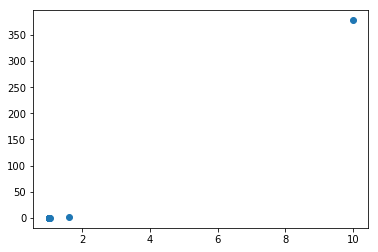

In [134]:
x_data = [1,2,3]
y_data = [1,2,3]
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(10,dtype=tf.float32,name='w')

hypothesis = X * W
learning_rate = 0.1
cost = tf.reduce_mean(tf.square(hypothesis - Y))
gradient = tf.reduce_mean((W*X-Y)*X) * 2
descent=W - learning_rate*gradient
update = W.assign(descent)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []


for i in range(20):
    cur_cost,cur_W = sess.run([cost,W], feed_dict={X:x_data,Y:y_data})
    sess.run([update,W],feed_dict={X:x_data,Y:y_data})
    print(f'{cur_W}, {cur_cost}')
    cost_val.append(cur_cost)
    W_val.append(cur_W)
plt.plot(W_val,cost_val,'o')
plt.show()

In [5]:
gvs

[(None, <tf.Variable 'w:0' shape=() dtype=float32_ref>),
 (None, <tf.Variable 'w_1:0' shape=() dtype=float32_ref>),
 (<tf.Tensor 'gradients_2/mul_8_grad/tuple/control_dependency_1:0' shape=() dtype=float32>,
  <tf.Variable 'w_2:0' shape=() dtype=float32_ref>)]

In [2]:
x_data = [1,2,3]
y_data = [1,2,3]
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
W = tf.Variable(5,dtype=tf.float32)


[37.333332, [(37.333336, 5.0)]]
[2.4888866, [(2.4888866, 1.2666664)]]
[0.16592591, [(0.16592591, 1.0177778)]]
[0.011061668, [(0.011061668, 1.0011852)]]
[0.00073742867, [(0.00073742867, 1.000079)]]
[4.895528e-05, [(4.8955284e-05, 1.0000052)]]
[3.0994415e-06, [(3.0994415e-06, 1.0000004)]]
[0.0, [(0.0, 1.0)]]
[0.0, [(0.0, 1.0)]]
[0.0, [(0.0, 1.0)]]
[0.0, [(0.0, 1.0)]]
[0.0, [(0.0, 1.0)]]
[0.0, [(0.0, 1.0)]]
[0.0, [(0.0, 1.0)]]
[0.0, [(0.0, 1.0)]]
[0.0, [(0.0, 1.0)]]
[0.0, [(0.0, 1.0)]]
[0.0, [(0.0, 1.0)]]
[0.0, [(0.0, 1.0)]]
[0.0, [(0.0, 1.0)]]
[1.2666664, 1.0177778, 1.0011852, 1.000079, 1.0000052, 1.0000004, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.33185121, 0.0014748968, 6.5550271e-06, 2.9132201e-08, 1.2839034e-10, 5.163277e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


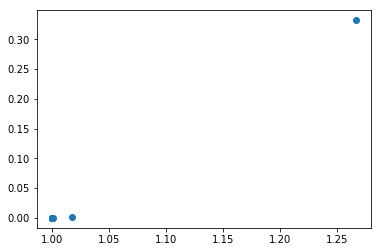

In [4]:


hypothesis = X * W
learning_rate = 0.1
cost = tf.reduce_mean(tf.square(hypothesis - Y))
gradient = tf.reduce_mean((W*X-Y)*X) *2
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)
gvs = optimizer.compute_gradients(cost)
#train = optimizer.apply_gradients(gvs)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

W_val = []
cost_val = []


for i in range(20):
    print(sess.run([gradient ,gvs], feed_dict={X:x_data, Y:y_data}))
    sess.run(train, feed_dict={X:x_data, Y:y_data})
    W_val.append(sess.run(W))
    cost_val.append(sess.run(cost, feed_dict={X:x_data, Y:y_data}))
    
print(W_val)
print(cost_val)
plt.plot(W_val,cost_val,'o')
plt.show()